# 1.	Objectif 


L’objectif de cet atelier est de decouvrire les techniques de vectorisation non superivisés: SVD, Word2Vec et GloVe
Nous reprenons le meme dataset de l'atelier precedent

# 2.	Outils et environnement de travail 


    *installer Gensim: pip install --upgrade gensim

# 1.	Preparation du DataSet

Ecrire le code permettant de Recuperer le dataset du plagiarisme traité dans l'atelier precedent: 

In [4]:
import glob

def get_corpus(url):
    '''Uttiliser la librairie glob pour recuperer les documents dans une 
    liste de listes dont les sous listes representent le contenu des documents 
    du corpus'''
    files=glob.glob(url)
    f_pointers=[open(file,"r",encoding="utf8", errors='ignore') for file in files]
    corpus=[f.read() for f in f_pointers]
    return corpus

corpus = get_corpus('/home/mohcin/UM6P/TextMining/TPs/corpus-20090418/*')

Appliquer les Praitraitements necessaires 

In [6]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def preprocessing(corpus):
    '''Appliquer la segmentation, le cleaning et la lemmatisation'''
    lemmmatizer=WordNetLemmatizer()
    corpus_lemetized = []
    for doc in corpus:
        tokens = word_tokenize(doc)
        lemmas = [lemmmatizer.lemmatize(word.lower()) for word in tokens if(not word in set(stopwords.words('english')) and  word.isalpha())]
        corpus_lemetized.append(lemmas)
    
    return corpus_lemetized
    #print('Liste des Lemmas nettoyés\n',clean_lemmas)

In [125]:
c = preprocessing(corpus)
print(c)

[['a', 'vector', 'space', 'model', 'term', 'vector', 'model', 'algebraic', 'way', 'representing', 'text', 'document', 'object', 'general', 'vector', 'identifier', 'index', 'term', 'it', 'used', 'information', 'filtering', 'information', 'retrieval', 'indexing', 'relevancy', 'ranking', 'it', 'first', 'application', 'smart', 'information', 'retrieval', 'system', 'a', 'document', 'represented', 'vector', 'every', 'dimension', 'relates', 'different', 'term', 'if', 'term', 'appears', 'document', 'term', 'value', 'vector', 'many', 'different', 'method', 'calculating', 'value', 'sometimes', 'known', 'term', 'weight', 'developed', 'weighting', 'one', 'well', 'known', 'scheme', 'see', 'example', 'the', 'definition', 'term', 'depends', 'application', 'normally', 'term', 'single', 'word', 'keyword', 'longer', 'phrase', 'if', 'word', 'chosen', 'term', 'dimensionality', 'vector', 'number', 'word', 'vocabulary', 'number', 'distinct', 'word', 'occurring', 'corpus', 'the', 'vector', 'space', 'model', 

Generer le vocabulaire sous forme d'une liste de termes distincts est triés dans l'ordre lexicographique

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

def getVocab(corpus):
    #'''Generer un vocabulaire composé de tous les mots du corpus triés dans l'''ordre croissant
    vocab = []
    lemmmatizer=WordNetLemmatizer()
    for doc in corpus:
        tokens = word_tokenize(doc)
        lemmas = [lemmmatizer.lemmatize(word.lower()) for word in tokens if(not word in set(stopwords.words('english')) and  word.isalpha())]
        vocab.extend(lemmas)
        vocab = list(set(vocab))
    return sorted(vocab)

In [126]:
vocabulary = getVocab(corpus)
print(vocabulary)

['a', 'ab', 'ability', 'able', 'abstraction', 'abstractly', 'abused', 'academic', 'acceptable', 'accepted', 'access', 'accidently', 'accomplished', 'according', 'accordingly', 'account', 'accuracy', 'accurate', 'accurately', 'achieve', 'achieved', 'acoustic', 'acquire', 'acquired', 'across', 'act', 'action', 'actively', 'activity', 'actual', 'actually', 'add', 'added', 'adding', 'addition', 'additional', 'additionally', 'address', 'adjacent', 'adjust', 'adoursment', 'advance', 'advanced', 'advantage', 'advantageous', 'advertising', 'aeroplane', 'affect', 'affected', 'after', 'age', 'agree', 'ai', 'aim', 'aka', 'algebra', 'algebraic', 'algorithm', 'algorithmic', 'algorthem', 'allow', 'allowes', 'allowing', 'allows', 'allready', 'alone', 'along', 'alot', 'already', 'also', 'alter', 'alteration', 'alternate', 'although', 'always', 'amateur', 'american', 'among', 'amongst', 'amount', 'an', 'analyse', 'analysing', 'analysis', 'analyzes', 'ancestor', 'and', 'anf', 'angle', 'animal', 'annotat

# 2.	Approche à base des Cooccurrences

Construire une matrice carrée des cooccurrences (Terme à Terme) pour  une fenêtre de taille 𝑛 en considérant les n mots  avant et après le mot  central de la fenêtre. 


In [128]:
import numpy as np
def CoMat(vocabulary,corpus,n):
    V=len(vocabulary)
    M=np.zeros((V,V))
    for doc in corpus:
        T=len(doc)-2*n+1 if n<len(doc) else 1  #le nombre de fenetre dans le document
        for t in range(T):
            ''' A completer'''
            for w1 in range(t,2*n+t+1):
                for w2 in range(w1+1,2*n+t):
                    index_w1 = vocabulary.index(doc[w1])
                    index_w2 = vocabulary.index(doc[w2])
                    M[index_w1,index_w2] += 1
                    M[index_w2,index_w1] += 1
    return M

In [129]:
M = CoMat(vocabulary,c,2)

Appliquer La SVD pour obtenir une representation vectorielle des differents mots du vocabulaire dans un espace de dimension 2. 

In [130]:

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

def Reduce(M,k=2):
    svd = TruncatedSVD(n_components=k)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)
    vectors = lsa.fit_transform(M)
    return vectors 


In [132]:
vectors = Reduce(M,k=2)
vectors[0]

array([ 0.90838397, -0.41813702])

En se servant de la bibliotheque matplotlib Tracer les vecteurs obtenus dans un plan 2D 

In [22]:
from matplotlib import pyplot

def plotVectors(vectors, vocabulary):
    V=len(vocabulary)
    x=[vectors[i][0] for i in range(V)]
    y=[vectors[i][1] for i in range(V)]
    fig, ax = pyplot.subplots()
    ax.scatter(x, y)
    for i, txt in enumerate(vocabulary):
        ax.annotate(txt, (x[i], y[i]))

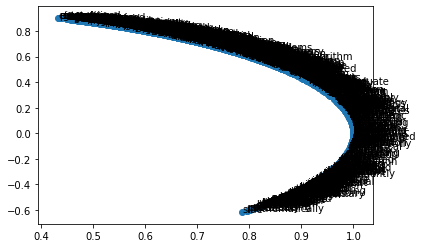

In [178]:
plotVectors(vectors, vocabulary)

# 3.	Approchee iteratives 

## 3.1. Word2Vec

Word2Vec est un algorithme à base des réseaux de neurones et qui permet d'avoir une représentation vectorielle des mots contenus dans un corpus très large de documents texte de telle sorte que les mots qui se répètent toujours ensemble dans les mêmes contextes auront des représentations vectorielles similaires.

L'algorithme word2Vect doit tourner sur un corpus très large de documents texte afin d'obtenir un modèle donnant une bonne représentation vectorielle d'un nombre important de mots. Cela nécessitera bien évidement un temps considérable pendant le processus d'apprentissage et nécessitera également des ressources importantes en matière de CPU et de RAM. 

La librairie Gensim fourni une implémentation de l'algorithme Word2Vec avec des modèles préétablis qui peuvent être exploités dans la comparaison de documents texte :

    *fasttext-wiki-news-subwords-300
    *conceptnet-numberbatch-17-06-300
    *word2vec-ruscorpora-300
    *word2vec-google-news-300
    *glove-wiki-gigaword-50
    *glove-wiki-gigaword-100
    *glove-wiki-gigaword-200
    *glove-wiki-gigaword-300
    *glove-twitter-25
    *glove-twitter-50
    *glove-twitter-100
    *glove-twitter-200

Ci-dessous un code permettant de récupérer le modèle préétabli contenant 1193514 mots représentés dans un espace vectoriel de dimension 25

In [1]:
import gensim.downloader
glove_vectors = gensim.downloader.load('glove-twitter-25')


/home/mohcin/anaconda3/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[==================================================] 100.0% 104.8/104.8MB downloaded


Le modèle préétablis peut être utilisé pour récupérer les représentations vectorielles des mots comme ci-dessous.

Genism offre plusieurs fonctions permettant de récupérer et d'exploiter les similarités entre les mots en se basant sur leurs représentations vectorielles.

    *Le code ci-deesous permet de ecuperer les 10 terms les plus similaires à un terme donné. 

In [3]:
glove_vectors.most_similar('data',topn=10)

[('mobile', 0.8975884914398193),
 ('software', 0.867477297782898),
 ('search', 0.8633924722671509),
 ('survey', 0.8620768189430237),
 ('web', 0.8545363545417786),
 ('server', 0.854297935962677),
 ('marketing', 0.8416521549224854),
 ('file', 0.8381796479225159),
 ('system', 0.8372836112976074),
 ('google', 0.8370377421379089)]

    *Le code ci-dessous permet de récupérer l'ordre de similarité entre deux termes?

In [4]:
glove_vectors.similarity('data', 'information')

0.8011154

    *Le code ci-dessous permet de récupérer le terme le moins convenable dans un ensemble de termes en se basant sur leurs similarités.

In [5]:
print(glove_vectors.doesnt_match(['data', 'information', 'processing', 'computer', 'car','machine','dashboard']))

car


Bien évidemment, on peut apprendre notre propre modèle en suivant les étapes ci-dessous

    *Récupérer le corpus (Voir le code dans la section 1)
    *Réaliser les prétraitements nécessaires pour obtenir la liste des documents segmentés: une liste de listes tq chaque sous listes comporte les mots d'un documents du corpus.

In [7]:
def preprocessing(corpus):
    '''Appliquer la segmentation, le cleaning et la lemmatisation'''
    lemmmatizer=WordNetLemmatizer()
    corpus_lemetized = []
    for doc in corpus:
        tokens = word_tokenize(doc)
        lemmas = [lemmmatizer.lemmatize(word.lower()) for word in tokens if(not word in set(stopwords.words('english')) and  word.isalpha())]
        corpus_lemetized.append(lemmas)
    
    return corpus_lemetized
    #print('Liste des Lemmas nettoyés\n',clean_lemmas)

In [8]:
corpus_lemetized = preprocessing(corpus)

In [9]:
corpus_lemetized

[['a',
  'vector',
  'space',
  'model',
  'term',
  'vector',
  'model',
  'algebraic',
  'way',
  'representing',
  'text',
  'document',
  'object',
  'general',
  'vector',
  'identifier',
  'index',
  'term',
  'it',
  'used',
  'information',
  'filtering',
  'information',
  'retrieval',
  'indexing',
  'relevancy',
  'ranking',
  'it',
  'first',
  'application',
  'smart',
  'information',
  'retrieval',
  'system',
  'a',
  'document',
  'represented',
  'vector',
  'every',
  'dimension',
  'relates',
  'different',
  'term',
  'if',
  'term',
  'appears',
  'document',
  'term',
  'value',
  'vector',
  'many',
  'different',
  'method',
  'calculating',
  'value',
  'sometimes',
  'known',
  'term',
  'weight',
  'developed',
  'weighting',
  'one',
  'well',
  'known',
  'scheme',
  'see',
  'example',
  'the',
  'definition',
  'term',
  'depends',
  'application',
  'normally',
  'term',
  'single',
  'word',
  'keyword',
  'longer',
  'phrase',
  'if',
  'word',
  'cho

Pour générer le modèle

In [27]:
from gensim.models import Word2Vec
from gensim.test.utils import datapath
from gensim.models.word2vec import PathLineSentences
corpus_lemetized = preprocessing(corpus)
model = Word2Vec(sentences=corpus_lemetized, vector_size=10, window=3, min_count=1, workers=2)

Pour récupérer la representation vectorielle d'un mot:   

In [17]:
model.wv['data']

array([ 7.6878518e-02,  1.1236072e-02,  8.2770921e-02,  2.7959192e-02,
        1.3599446e-01,  1.2510993e-04,  1.7601092e-01, -9.6715316e-03,
       -7.4748158e-02,  4.7240285e-03], dtype=float32)

Pour récupérer tous les vecteurs

In [56]:
vectors=model.wv.vectors
vectors

array([[ 0.6712292 ,  0.7328831 ,  0.74308217, -2.5713108 , -0.873573  ],
       [-0.14734611,  0.72848666,  0.26357612, -2.7837749 , -1.173148  ],
       [ 0.08468706,  0.4533711 , -0.1391487 , -2.7876053 , -1.3943157 ],
       ...,
       [-0.0747695 ,  0.07649542,  0.03833421, -0.30659547,  0.12407771],
       [ 0.12611769, -0.13695952,  0.12275229, -0.06182694, -0.0295365 ],
       [ 0.06548982, -0.17732991, -0.01528817,  0.01887538,  0.10248714]],
      dtype=float32)

Recuperer tous le smots 

In [57]:
words = model.wv.index_to_key
words

['probability',
 'the',
 'class',
 'vector',
 'document',
 'term',
 'page',
 'programming',
 'used',
 'pagerank',
 'a',
 'problem',
 'inheritance',
 'link',
 'bayes',
 'method',
 'b',
 'theorem',
 'word',
 'value',
 'one',
 'solution',
 'optimal',
 'model',
 'p',
 'it',
 'google',
 'object',
 'in',
 'given',
 'event',
 'information',
 'space',
 'also',
 'number',
 'subproblems',
 'algorithm',
 'dynamic',
 'example',
 'called',
 'way',
 'conditional',
 'new',
 'using',
 'may',
 'web',
 'for',
 'student',
 'search',
 'this',
 'time',
 'mean',
 'two',
 'many',
 'code',
 'known',
 'different',
 'computer',
 'query',
 'result',
 'retrieval',
 'however',
 'random',
 'use',
 'program',
 'compute',
 'fruit',
 'represented',
 'apple',
 'first',
 'find',
 'need',
 'marginal',
 'set',
 'solving',
 'inherit',
 'property',
 'if',
 'subclass',
 'system',
 'site',
 'theory',
 'process',
 'importance',
 'approach',
 'match',
 'ranking',
 'substructure',
 'instance',
 'application',
 'similarity',
 'co

   * **Appliquer La SVD pour reduire la dimesion de la representation vectorielle des termes pour les representer dans un espace de dimension 2
   * **Tracer les vecteurs obtenus en se seravt de la bibliotheque matplolib



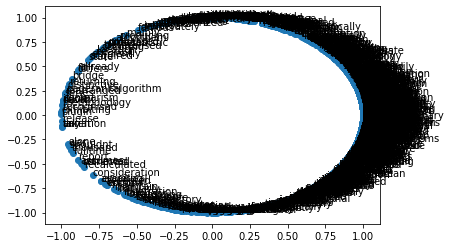

In [58]:
M = Reduce(vectors,k=2)
plotVectors(M, words)

**En se servant de la représentation vectorielle obtenue, calculer les similarités entre les réponses des étudiants et les définitions trouvées sur Wikipédia.

1. Réaliser une représentation vectorielle des documents en se basant sur les représentations vectorielles de leurs mots (une moyenne par exemple) et utiliser par la suite la distance euclidienne ou la distance corsinus.

2. Utiliser l'indice de Jaccard en comparant directement les mots deux à deux (on considère un seuil de similarité >0.7)

3. Utiliser une approche n-grame en utilisant une fenêtre de n termes.



## 1. représentation vectorielle des documents


In [69]:
from sklearn.metrics.pairwise import cosine_distances,euclidean_distances

def sim_doc(corpus,index_of_doc,model,distance="cosine"):
    # preprocessing le corpus
    corpus_lemetized = preprocessing(corpus)
    # générer le modèle Word2vec
    doc_vector = []
    for doc in corpus_lemetized:
        count = 0
        vector = 0
        for word in doc:
            count  += 1
            vector += model.wv[word]
        doc_vector.append(vector/count)
    if (distance == "cosine"):
        return (cosine_distances(doc_vector[index_of_doc:index_of_doc+1],doc_vector))
    else:
        return (1-euclidean_distances(doc_vector[index_of_doc:index_of_doc+1],doc_vector))

In [71]:
# load corpus
import glob
import os
files=glob.glob('/home/mohcin/UM6P/TextMining/TPs/corpus-20090418/*')
#f_pointers=[open(file,"r",encoding="utf8",errors='ignore') for file in files]
files_names =[os.path.basename(os.path.splitext(file)[0]) for file in sorted(files)]
corpus_wiki = [open(file,"r",encoding="utf8",errors='ignore').read() for file in sorted(files)]

corpus_lemetized = preprocessing(corpus_wiki)
model = Word2Vec(sentences=corpus_lemetized, vector_size=10, window=3, min_count=1, workers=2)

    
# séparer les tasks dans différents corpus
task_a = corpus_wiki[slice(0,100,5)]
task_b = corpus_wiki[slice(1,100,5)]
task_c = corpus_wiki[slice(2,100,5)]
task_d = corpus_wiki[slice(3,100,5)]
task_e = corpus_wiki[slice(4,100,5)]

task_a_names = files_names[slice(0,100,5)]
task_b_names = files_names[slice(1,100,5)]
task_c_names = files_names[slice(2,100,5)]
task_d_names = files_names[slice(3,100,5)]
task_e_names = files_names[slice(4,100,5)]

# test
import pandas as pd
print("similarité task A")
df_taskA = pd.DataFrame(sim_doc(task_a,19,model,distance="euclidean")[0][:19],task_a_names[:19],task_a_names[19:20])
print(df_taskA)
print("la réponse la plus similaire est : ",df_taskA.orig_taska.idxmax())

print("\nsimilarité task B")
df_taskB = pd.DataFrame(sim_doc(task_b,19,model,distance="euclidean")[0][:19],task_b_names[:19],task_b_names[19:20])
print(df_taskB)
print("la réponse la plus similaire est : ",df_taskB.orig_taskb.idxmax())


print("\nsimilarité task C")
df_taskC = pd.DataFrame(sim_doc(task_c,19,model,distance="euclidean")[0][:19],task_c_names[:19],task_c_names[19:20])
print(df_taskC)
print("la réponse la plus similaire est : ",df_taskC.orig_taskc.idxmax())

print("\nsimilarité task D")
df_taskD = pd.DataFrame(sim_doc(task_d,19,model,distance="euclidean")[0][:19],task_d_names[:19],task_d_names[19:20])
print(df_taskD)
print("la réponse la plus similaire est : ",df_taskD.orig_taskd.idxmax())

print("\nsimilarité task E")
df_taskE = pd.DataFrame(sim_doc(task_e,19,model,distance="euclidean")[0][:19],task_e_names[:19],task_e_names[19:20])
print(df_taskE)
print("la réponse la plus similaire est : ",df_taskE.orig_taske.idxmax())

similarité task A
            orig_taska
g0pA_taska    0.942372
g0pB_taska    0.820938
g0pC_taska    0.934795
g0pD_taska    0.946719
g0pE_taska    0.995415
g1pA_taska    0.937036
g1pB_taska    0.751924
g1pD_taska    0.947878
g2pA_taska    0.763951
g2pB_taska    0.958189
g2pC_taska    0.979126
g2pE_taska    0.924136
g3pA_taska    0.927954
g3pB_taska    0.867758
g3pC_taska    0.926820
g4pB_taska    0.876869
g4pC_taska    0.981890
g4pD_taska    0.909725
g4pE_taska    0.943413
la réponse la plus similaire est :  g0pE_taska

similarité task B
            orig_taskb
g0pA_taskb    0.972541
g0pB_taskb    0.941009
g0pC_taskb    0.963896
g0pD_taskb    0.899681
g0pE_taskb    0.936664
g1pA_taskb    0.971458
g1pB_taskb    0.981718
g1pD_taskb    0.965598
g2pA_taskb    0.962784
g2pB_taskb    0.953366
g2pC_taskb    0.867102
g2pE_taskb    0.891957
g3pA_taskb    0.883625
g3pB_taskb    0.922693
g3pC_taskb    0.912492
g4pB_taskb    0.905874
g4pC_taskb    0.928638
g4pD_taskb    0.979567
g4pE_taskb    0.984

## 2. l'indice de JACCARD

In [115]:
def jaccard(doc1,doc2):
    intersection = set(doc1).intersection(set(doc2))
    union = set(doc1).union(set(doc2))
    return len(intersection)/len(union)
    
def sim_jaccard(docs,index_of_doc,fenetre=2):
    
    docs_lemmatizer = preprocessing(docs) # lemmatizer les réponses 
    doc_origin = docs_lemmatizer[index_of_doc] # lemmatizer la réponse originale 
    
    
    # nombre de fenetre dans le doc original
    H=len(doc_origin)-fenetre if fenetre<len(doc_origin) else 1 
    
    sim_docs = []
    
    # parcour chaque document
    for doc in docs_lemmatizer: 
        score_doc = []
         
        # nombre de fenetre dans le doc
        T=len(doc)-fenetre if fenetre<len(doc) else 1
        
        # parcour chaque deux n=fenetre mots dans la fenetre
        for t in range(T):
            score = 0
            # crée une liste de mots selon la fenetre
            lis_word = [doc[w1] for w1 in range(t,fenetre+t)]
            
            # parcour chaque n=fenetre mots dans le doc origial 
            for h in range(H):
                # crée une liste de mots selon la fenetre
                lis_word_origin = [doc_origin[w1] for w1 in range(h,fenetre+h)]
                
                # calculer la sim de jaccard etre chaque deux mots
                new_score = jaccard(lis_word,lis_word_origin)
                
                # recuperer la sim max entre les deux à deux mots
                if(new_score>score):
                    score = new_score
                    
            # stocker la sim max entre les deux à deux mots
            score_doc.append(score)
        
        # calculer la sim du deux doc avec la moyenne
        sim_docs.append(sum(score_doc)/len(score_doc))
            
    
    return sim_docs

In [120]:
import glob
import os
files=glob.glob('/home/mohcin/UM6P/TextMining/TPs/corpus-20090418/*')
#f_pointers=[open(file,"r",encoding="utf8",errors='ignore') for file in files]
files_names =[os.path.basename(os.path.splitext(file)[0]) for file in sorted(files)]
corpus_wiki = [open(file,"r",encoding="utf8",errors='ignore').read() for file in sorted(files)]

# séparer les tasks dans différents corpus
task_a = corpus_wiki[slice(0,100,5)]
task_b = corpus_wiki[slice(1,100,5)]
task_c = corpus_wiki[slice(2,100,5)]
task_d = corpus_wiki[slice(3,100,5)]
task_e = corpus_wiki[slice(4,100,5)]

task_a_names = files_names[slice(0,100,5)]
task_b_names = files_names[slice(1,100,5)]
task_c_names = files_names[slice(2,100,5)]
task_d_names = files_names[slice(3,100,5)]
task_e_names = files_names[slice(4,100,5)]

import pandas as pd
print("similarité task A")
df_taskA = pd.DataFrame(sim_jaccard(task_a,19)[:19],task_a_names[:19],task_a_names[19:20])
print(df_taskA)
print("la réponse la plus similaire est : ",df_taskA.orig_taska.idxmax())

print("\nsimilarité task B")
df_taskB = pd.DataFrame(sim_jaccard(task_b,19)[:19],task_b_names[:19],task_b_names[19:20])
print(df_taskB)
print("la réponse la plus similaire est : ",df_taskB.orig_taskb.idxmax())


print("\nsimilarité task C")
df_taskC = pd.DataFrame(sim_jaccard(task_c,19)[:19],task_c_names[:19],task_c_names[19:20])
print(df_taskC)
print("la réponse la plus similaire est : ",df_taskC.orig_taskc.idxmax())

print("\nsimilarité task D")
df_taskD = pd.DataFrame(sim_jaccard(task_d,19)[:19],task_d_names[:19],task_d_names[19:20])
print(df_taskD)
print("la réponse la plus similaire est : ",df_taskD.orig_taskd.idxmax())

print("\nsimilarité task E")
df_taskE = pd.DataFrame(sim_jaccard(task_e,19)[:19],task_e_names[:19],task_e_names[19:20])
print(df_taskE)
print("la réponse la plus similaire est : ",df_taskE.orig_taske.idxmax())

similarité task A
            orig_taska
g0pA_taska    0.196000
g0pB_taska    0.170807
g0pC_taska    0.398754
g0pD_taska    0.846405
g0pE_taska    0.991870
g1pA_taska    0.298246
g1pB_taska    0.183761
g1pD_taska    0.525538
g2pA_taska    0.166667
g2pB_taska    0.193798
g2pC_taska    0.755747
g2pE_taska    0.705616
g3pA_taska    0.268333
g3pB_taska    0.203526
g3pC_taska    0.966667
g4pB_taska    0.222727
g4pC_taska    0.988889
g4pD_taska    0.552083
g4pE_taska    0.410145
la réponse la plus similaire est :  g0pE_taska

similarité task B
            orig_taskb
g0pA_taskb    0.984463
g0pB_taskb    0.368957
g0pC_taskb    0.267974
g0pD_taskb    0.722222
g0pE_taskb    0.692090
g1pA_taskb    0.365741
g1pB_taskb    0.283951
g1pD_taskb    0.485556
g2pA_taskb    0.464612
g2pB_taskb    0.314159
g2pC_taskb    0.381188
g2pE_taskb    0.767068
g3pA_taskb    0.554012
g3pB_taskb    0.293249
g3pC_taskb    0.324176
g4pB_taskb    0.235772
g4pC_taskb    0.375000
g4pD_taskb    0.280303
g4pE_taskb    0.949

## 3.  l'indice de JACCARD avec n gram

pour appliquer la similarité de JACCARD avec n gram, il suffit d'utilisé la fonction <b>sim_jaccard(docs,index_of_doc,fenetre=n)</b>, avec fenetre égale à n

# 3.2. Doc2Vec

Doc2Vec est une implémentation de l'algorithme Paragraph Vector qui est basé sur Word2Vec et qui est plus adapté à la comparaison de documents texte en se basant sur leur représentations vectorielles.

Cet algorithme dépasse dans sa performance l’utilisation des moyenne des représentations vectorielles des mots présents dans un documents texte.


    *Generer le modèle

In [51]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
corpus_lemetized = preprocessing(corpus_wiki)
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus_lemetized)]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

Pour récupérer la representation vectorielle de tous les documents   

In [52]:
vectors=model.dv.vectors
vectors

array([[-4.38093133e-02,  3.81029308e-01, -1.48504108e-01,
        -2.54207778e+00, -1.01327145e+00],
       [ 4.06162292e-02,  2.89903373e-01,  5.97221777e-02,
        -2.49744463e+00, -8.13932836e-01],
       [ 1.39305517e-01,  5.62358618e-01, -5.31629845e-03,
        -1.88280165e+00, -6.57020509e-01],
       [ 1.81285897e-03,  6.80952668e-01,  3.48413020e-01,
        -2.93855858e+00, -1.02915215e+00],
       [-1.00862585e-01,  4.98183340e-01, -1.12111114e-01,
        -2.27288508e+00, -8.95827293e-01],
       [-2.56108075e-01,  5.47238648e-01, -2.17086151e-01,
        -3.76103950e+00, -1.79219985e+00],
       [ 1.36458397e-01,  6.83379233e-01,  1.29655916e-02,
        -2.62094831e+00, -9.64028537e-01],
       [ 1.63172945e-01,  6.53645992e-01, -6.29664585e-02,
        -2.60186768e+00, -7.60460258e-01],
       [ 3.57399046e-01,  3.60478431e-01,  4.61150110e-01,
        -2.15235591e+00, -3.94565225e-01],
       [-2.16181651e-01,  4.59448993e-01, -5.80182560e-02,
        -2.40326071e+00

Pour récupérer la les labels de tous les documents   

In [53]:
labels=model.dv.index_to_key
labels

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

Pour récupérer la représentation vectorielle d'un document particulier:

In [54]:
model.dv[80]

array([-0.24983741,  0.2512851 , -0.25239784, -3.0250585 , -1.5323595 ],
      dtype=float32)

    **Appliquer La SVD pour réduire la dimension de la représentation vectorielle des termes pour les représenter dans un espace de dimension 2?
    **Tracer les vecteurs obtenus en se servant de la bibliothèque matplolib?

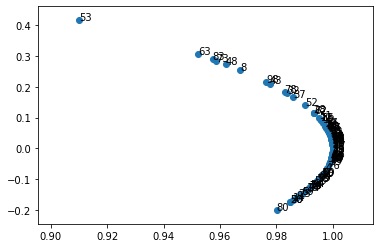

In [55]:
M = Reduce(vectors,k=2)
plotVectors(M, labels)

    **Recalculer les similarités entre les réponses des étudiants et les définitions trouvées sur Wikipédia en se basant sur ses nouvelles représentations ?

In [90]:
def sim_doc2vec(doc_vector,index_of_doc,distance="euclidean"):
    if (distance != "euclidean"):
        return (cosine_distances(doc_vector[index_of_doc:index_of_doc+1],doc_vector))
    else:
        return (1-euclidean_distances(doc_vector[index_of_doc:index_of_doc+1],doc_vector))

In [91]:
# preprocessing le corpus
corpus_lemetized = preprocessing(corpus_wiki)

# générer le modèle Word2vec
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus_lemetized)]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)
doc_vector = model.dv.vectors

task_a = doc_vector[slice(0,100,5)]
task_b = doc_vector[slice(1,100,5)]
task_c = doc_vector[slice(2,100,5)]
task_d = doc_vector[slice(3,100,5)]
task_e = doc_vector[slice(4,100,5)]

task_a_names = files_names[slice(0,100,5)]
task_b_names = files_names[slice(1,100,5)]
task_c_names = files_names[slice(2,100,5)]
task_d_names = files_names[slice(3,100,5)]
task_e_names = files_names[slice(4,100,5)]

print("similarité task A")
df_taskA = pd.DataFrame(sim_doc2vec(task_a,19)[0][:19],task_a_names[:19],task_a_names[19:20])
print(df_taskA)
print("la réponse la plus similaire est : ",df_taskA.orig_taska.idxmax())

print("\nsimilarité task B")
df_taskB = pd.DataFrame(sim_doc2vec(task_b,19)[0][:19],task_b_names[:19],task_b_names[19:20])
print(df_taskB)
print("la réponse la plus similaire est : ",df_taskB.orig_taskb.idxmax())

print("\nsimilarité task C")
df_taskC = pd.DataFrame(sim_doc2vec(task_c,19)[0][:19],task_c_names[:19],task_c_names[19:20])
print(df_taskC)
print("la réponse la plus similaire est : ",df_taskC.orig_taskc.idxmax())

print("\nsimilarité task D")
df_taskD = pd.DataFrame(sim_doc2vec(task_d,19)[0][:19],task_d_names[:19],task_d_names[19:20])
print(df_taskD)
print("la réponse la plus similaire est : ",df_taskD.orig_taskd.idxmax())

print("\nsimilarité task E")
df_taskE = pd.DataFrame(sim_doc2vec(task_e,19)[0][:19],task_e_names[:19],task_e_names[19:20])
print(df_taskE)
print("la réponse la plus similaire est : ",df_taskE.orig_taske.idxmax())

similarité task A
            orig_taska
g0pA_taska    0.484823
g0pB_taska   -0.082848
g0pC_taska    0.679350
g0pD_taska    0.197722
g0pE_taska    0.595148
g1pA_taska    0.370059
g1pB_taska    0.380782
g1pD_taska    0.632927
g2pA_taska   -0.764574
g2pB_taska    0.483064
g2pC_taska    0.537943
g2pE_taska    0.030088
g3pA_taska    0.469750
g3pB_taska    0.617469
g3pC_taska   -0.371232
g4pB_taska    0.330944
g4pC_taska    0.460535
g4pD_taska    0.468359
g4pE_taska   -0.054282
la réponse la plus similaire est :  g0pC_taska

similarité task B
            orig_taskb
g0pA_taskb   -0.528095
g0pB_taskb   -0.225154
g0pC_taskb   -0.550260
g0pD_taskb   -1.512372
g0pE_taskb   -1.167738
g1pA_taskb   -0.436996
g1pB_taskb   -0.252812
g1pD_taskb    0.397770
g2pA_taskb    0.243726
g2pB_taskb    0.032021
g2pC_taskb   -0.780306
g2pE_taskb   -0.463458
g3pA_taskb   -0.805308
g3pB_taskb    0.629841
g3pC_taskb   -0.014749
g4pB_taskb    0.474296
g4pC_taskb   -0.635888
g4pD_taskb    0.380220
g4pE_taskb   -0.666